In [ ]:
import numpy as np
from numpy import polyfit
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
X=[0,3,5,8,10,12,15,17.5]
C=[4,2.89,2.25,1.45,1.0,.65,0.25,0.02]
u = polyfit(X,C, deg=4)

In [ ]:
u

array([-5.76442862e-06,  1.45748770e-04,  8.92758236e-03, -3.97340856e-01,
        3.99955446e+00])

In [ ]:
def funcionPol(t, coeficientes):
  return (t**4)*coeficientes[0]+(t**3)*coeficientes[1]+(t**2)*coeficientes[2]+(t**1)*coeficientes[3]+coeficientes[4]
  #return (t**6)*coeficientes[0]+(t**5)*coeficientes[1]+(t**4)*coeficientes[2]+(t**3)*coeficientes[3]+(t**2)*coeficientes[4]+(t)*coeficientes[5]+coeficientes[6]

In [ ]:
def funcionPolderivada(t, coeficientes):
  return (t**3)*4*coeficientes[0]+(t**2)*3*coeficientes[1]+(t**1)*2*coeficientes[2]+coeficientes[3]
  #return (t**5)*6*coeficientes[0]+(t**4)*5*coeficientes[1]+(t**3)*4*coeficientes[2]+(t**2)*3*coeficientes[3]+(t)*2*coeficientes[4]+coeficientes[5]

In [ ]:
xpoli = [funcionPol(tiempo, u) for tiempo in X]
xderipoli = [funcionPolderivada(tiempo, u) for tiempo in X]

In [ ]:
xpoli


[3.999554455106504,
 2.891348425831851,
 2.2506555615438137,
 1.4432051474101733,
 1.0070086133319065,
 0.6493587238849186,
 0.2482255440094816,
 0.020643528881355344]

In [ ]:
xderipoli

[-0.3973408562097865,
 -0.3404627035212324,
 -0.3000160891182775,
 -0.2383213243378598,
 -0.19812229238186221,
 -0.15995914142257275,
 -0.10895275187487291,
 -0.07454372954314187]

In [ ]:
xderipolinegativa = [x*-1 for x in xderipoli]

In [ ]:
logaritmoDeXDeriPoliNegativa = [np.log(x) for x in xderipolinegativa]

In [ ]:
logaritmoxpoli = [np.log(x) for x in xpoli]

In [ ]:
m, b, r_value, p_value, std_err = stats.linregress(logaritmoxpoli,logaritmoDeXDeriPoliNegativa)
U = polyfit(logaritmoxpoli,logaritmoDeXDeriPoliNegativa, deg=1)

In [ ]:
U
m

0.3257664022358657

In [ ]:
b

-1.5285264658541386

In [ ]:
r_value**2

0.9283340231343815

Text(0, 0.5, 'Concentración de A en mol/dm^3')

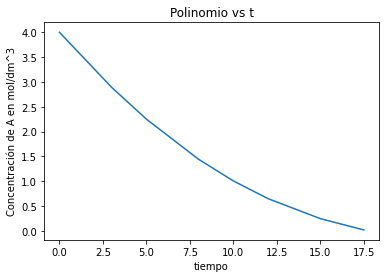

In [ ]:
plt.plot(X,xpoli)
plt.title("Polinomio vs t")
plt.xlabel("tiempo")
plt.ylabel("Concentración de A en mol/dm^3")

In [ ]:
k = np.exp(b)
k

0.2168549752133628

Text(0, 0.5, 'dC/dt')

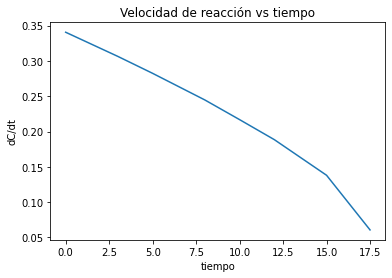

In [ ]:
check = [k*((res)**m) for res in C]
plt.plot(X, check)
plt.title("Velocidad de reacción vs tiempo")
plt.xlabel("tiempo")
plt.ylabel("dC/dt")

Text(0, 0.5, 'Concentración de A en mol/dm^3')

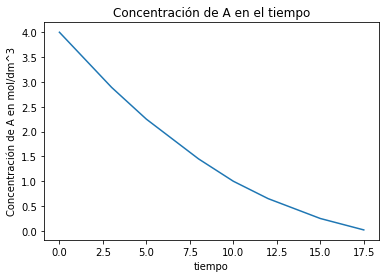

In [ ]:
plt.plot(X,C)
plt.title("Concentración de A en el tiempo")
plt.xlabel("tiempo")
plt.ylabel("Concentración de A en mol/dm^3")

Text(0.5, 0, 'ln(x)')

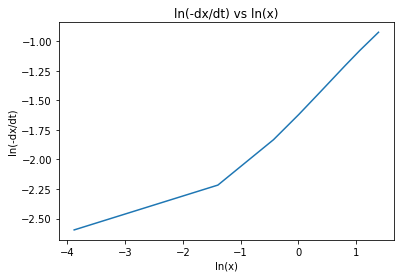

In [ ]:
plt.plot(logaritmoxpoli,logaritmoDeXDeriPoliNegativa)
plt.title("ln(-dx/dt) vs ln(x)")
plt.ylabel("ln(-dx/dt)")
plt.xlabel("ln(x)")